# The Importance of Handwashing

The purpose of this project is to answer the following:
* What year had the highest yearly proportion of deaths at each clinic?
* What are the mean proportions of deaths before and after handwashing from the month data?
* Analyze the difference in the mean monthly proportion of deaths before and after the introduction of handwashing?

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Read in the data
monthly = pd.read_csv('data/monthly_deaths.csv')
yearly = pd.read_csv('data/yearly_deaths_by_clinic.csv')

# View the results
monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [7]:
yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [9]:
# Add the proportions to the yearly dataframe
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']

# View the results
yearly.head()

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


Text(0.5, 1.0, 'Proportion of Deaths Over Time by Clinic')

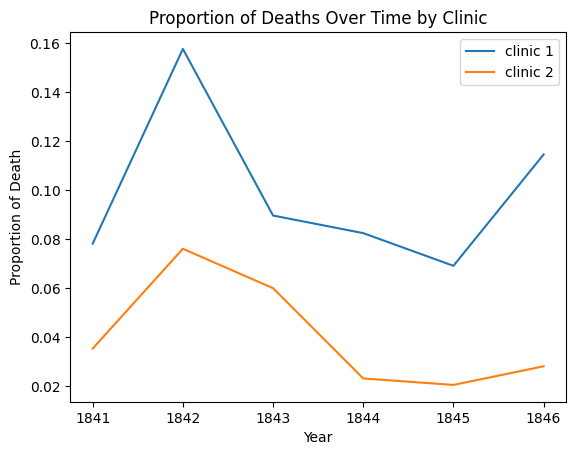

In [11]:
# Plot the data
for clinic_name in set(yearly['clinic']):
    subset = yearly[yearly['clinic'] == clinic_name]
    plt.plot(subset['year'], subset['proportion_deaths'], label=clinic_name)
plt.xlabel('Year')
plt.ylabel('Proportion of Death')
plt.legend()
plt.title('Proportion of Deaths Over Time by Clinic')

In [12]:
# Identify the highest year and save it
highest_year = 1842

In [13]:
# Next move to monthy dataframe
# Add the proportions
monthly['proportion_deaths'] = monthly['deaths'] / monthly['births']

# View the results
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [14]:
# Create a variable for when handwashing starts 
handwashing_start = '1847-06-01'

In [15]:
# Create a boolean column that shows True after the date handwashing was introduced
monthly['handwashing_started'] = monthly['date'] >= handwashing_start

In [16]:
# Calculate the mean proportion of deaths, grouping by the handwashing status
monthly_summary = (
    monthly.groupby('handwashing_started')
    .agg(mean_proportion_deaths=('proportion_deaths', 'mean'))
    .reset_index()
)

# Display the results
print(monthly_summary)

   handwashing_started  mean_proportion_deaths
0                False                0.105050
1                 True                0.021093


In [18]:
# Evaluate the change in the mean monthly proportion of deaths and determine a 95% confidence interval

# Separate the dataset into periods before and after handwashing implementation
before_washing = monthly.query("date < @handwashing_start")
after_washing = monthly.query("date >= @handwashing_start")

# Extract proportion of deaths for each time period
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]

In [19]:
# Perform a bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

In [20]:
# Calculate a 95% confidence interval
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
print(confidence_interval)

0.025   -0.101392
0.975   -0.067516
dtype: float64
